<a href="https://colab.research.google.com/github/mteoraso/mteoraso/blob/main/Wind_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculo de rugosidad superficial para perfiles de viento de un mástil meteorológico en Høvsøre, Dinamarca. 

In [2]:
import pandas as pd
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_excel('/content/perfil_viento_V1.xlsx')
df.head(10)

,time (hour),u10 (m/s),u40 (m/s),u60 (m/s),u80 (m/s),u100 (m/s),u116 (Um/s),u160 (m/s),dir10,dir60,dir100,Unnamed: 11,Unnamed: 12,time decimal hours,Unnamed: 14,Unnamed: 15
0,00:00:00,4.25636,7.18414,8.56345,9.75567,10.9667,12.1298,13.8083,110.616,131.652,141.809,NaN,NaN,0.000000,NaN,midnight
1,00:10:00,4.54607,7.40763,8.62832,9.91782,11.2024,12.2694,14.1229,114.551,133.624,142.565,NaN,NaN,0.166667,NaN,NaN
2,00:20:00,4.48597,6.90398,8.06806,9.54922,10.9354,12.0622,14.1083,114.343,135.404,142.934,NaN,NaN,0.333333,NaN,NaN
3,00:30:00,4.29970,6.78310,8.18141,9.64565,10.9862,12.0684,13.8210,114.325,135.272,143.951,NaN,NaN,0.500000,NaN,NaN
4,00:40:00,4.32460,6.78405,8.07585,9.48084,10.7186,11.7632,13.6223,112.893,133.654,141.589,NaN,NaN,0.666667,NaN,NaN
5,00:50:00,4.39143,6.74700,8.17429,9.64272,10.8858,11.9759,13.9491,115.753,134.740,143.132,NaN,NaN,0.833333,NaN,NaN
6,01:00:00,4.37746,6.81312,8.31322,9.68177,10.9825,12.1531,14.3469,116.041,135.422,145.788,NaN,NaN,1.000000,NaN,NaN
7,01:10:00,4.42356,6.97187,8.32293,9.73835,11.0083,12.0661,13.9822,116.125,134.616,143.812,NaN,NaN,1.166667,NaN,NaN
8,01:20,4.35256,6.71715,8.04123,9.38698,10.8701,11.9126,13.5930,113.801,133.699,140.717,NaN,NaN,1.333333,NaN,NaN
9,01:30:00,4.20641,6.60790,7.88777,9.42703,10.8732,12.1210,13.8892,115.200,134.743,143.640,NaN,NaN,1.500000,NaN,NaN


In [4]:
df.columns

Index(['time (hour)', 'u10 (m/s)', 'u40 (m/s)', 'u60 (m/s)', 'u80 (m/s)',
       'u100 (m/s)', 'u116 (Um/s)', 'u160 (m/s)', 'dir10', 'dir60', 'dir100',
       'Unnamed: 11', 'Unnamed: 12', 'time decimal hours', 'Unnamed: 14',
       'Unnamed: 15'],
      dtype='object')

In [5]:
df = df.drop(columns=['Unnamed: 11','Unnamed: 12', 'Unnamed: 14'])
df.columns

Index(['time (hour)', 'u10 (m/s)', 'u40 (m/s)', 'u60 (m/s)', 'u80 (m/s)',
       'u100 (m/s)', 'u116 (Um/s)', 'u160 (m/s)', 'dir10', 'dir60', 'dir100',
       'time decimal hours', 'Unnamed: 15'],
      dtype='object')

In [6]:
df=df.rename(columns={'u116 (Um/s)':'u116 (m/s)'})
df.columns

Index(['time (hour)', 'u10 (m/s)', 'u40 (m/s)', 'u60 (m/s)', 'u80 (m/s)',
       'u100 (m/s)', 'u116 (m/s)', 'u160 (m/s)', 'dir10', 'dir60', 'dir100',
       'time decimal hours', 'Unnamed: 15'],
      dtype='object')

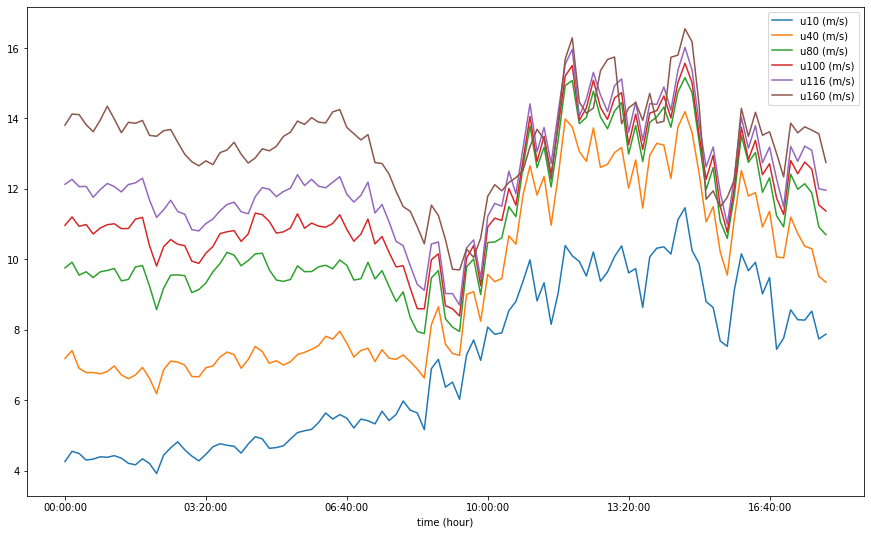

In [7]:
df.plot('time (hour)', ['u10 (m/s)','u40 (m/s)','u80 (m/s)', 'u100 (m/s)', 'u116 (m/s)', 'u160 (m/s)'], figsize=(15,9))

In [8]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


u10 (m/s)               6.51214
u40 (m/s)               7.95529
u60 (m/s)               8.91432
u80 (m/s)               9.97902
u100 (m/s)             11.10360
u116 (m/s)             12.06610
u160 (m/s)             13.53930
dir10                 123.54300
dir60                 130.22600
dir100                134.34600
time decimal hours      9.00000
dtype: float64

In [9]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


u10 (m/s)               6.962781
u40 (m/s)               9.270997
u60 (m/s)              10.161209
u80 (m/s)              10.961884
u100 (m/s)             11.673099
u116 (m/s)             12.314675
u160 (m/s)             13.271278
dir10                 122.491655
dir60                 130.241761
dir100                134.265936
time decimal hours      9.000000
dtype: float64

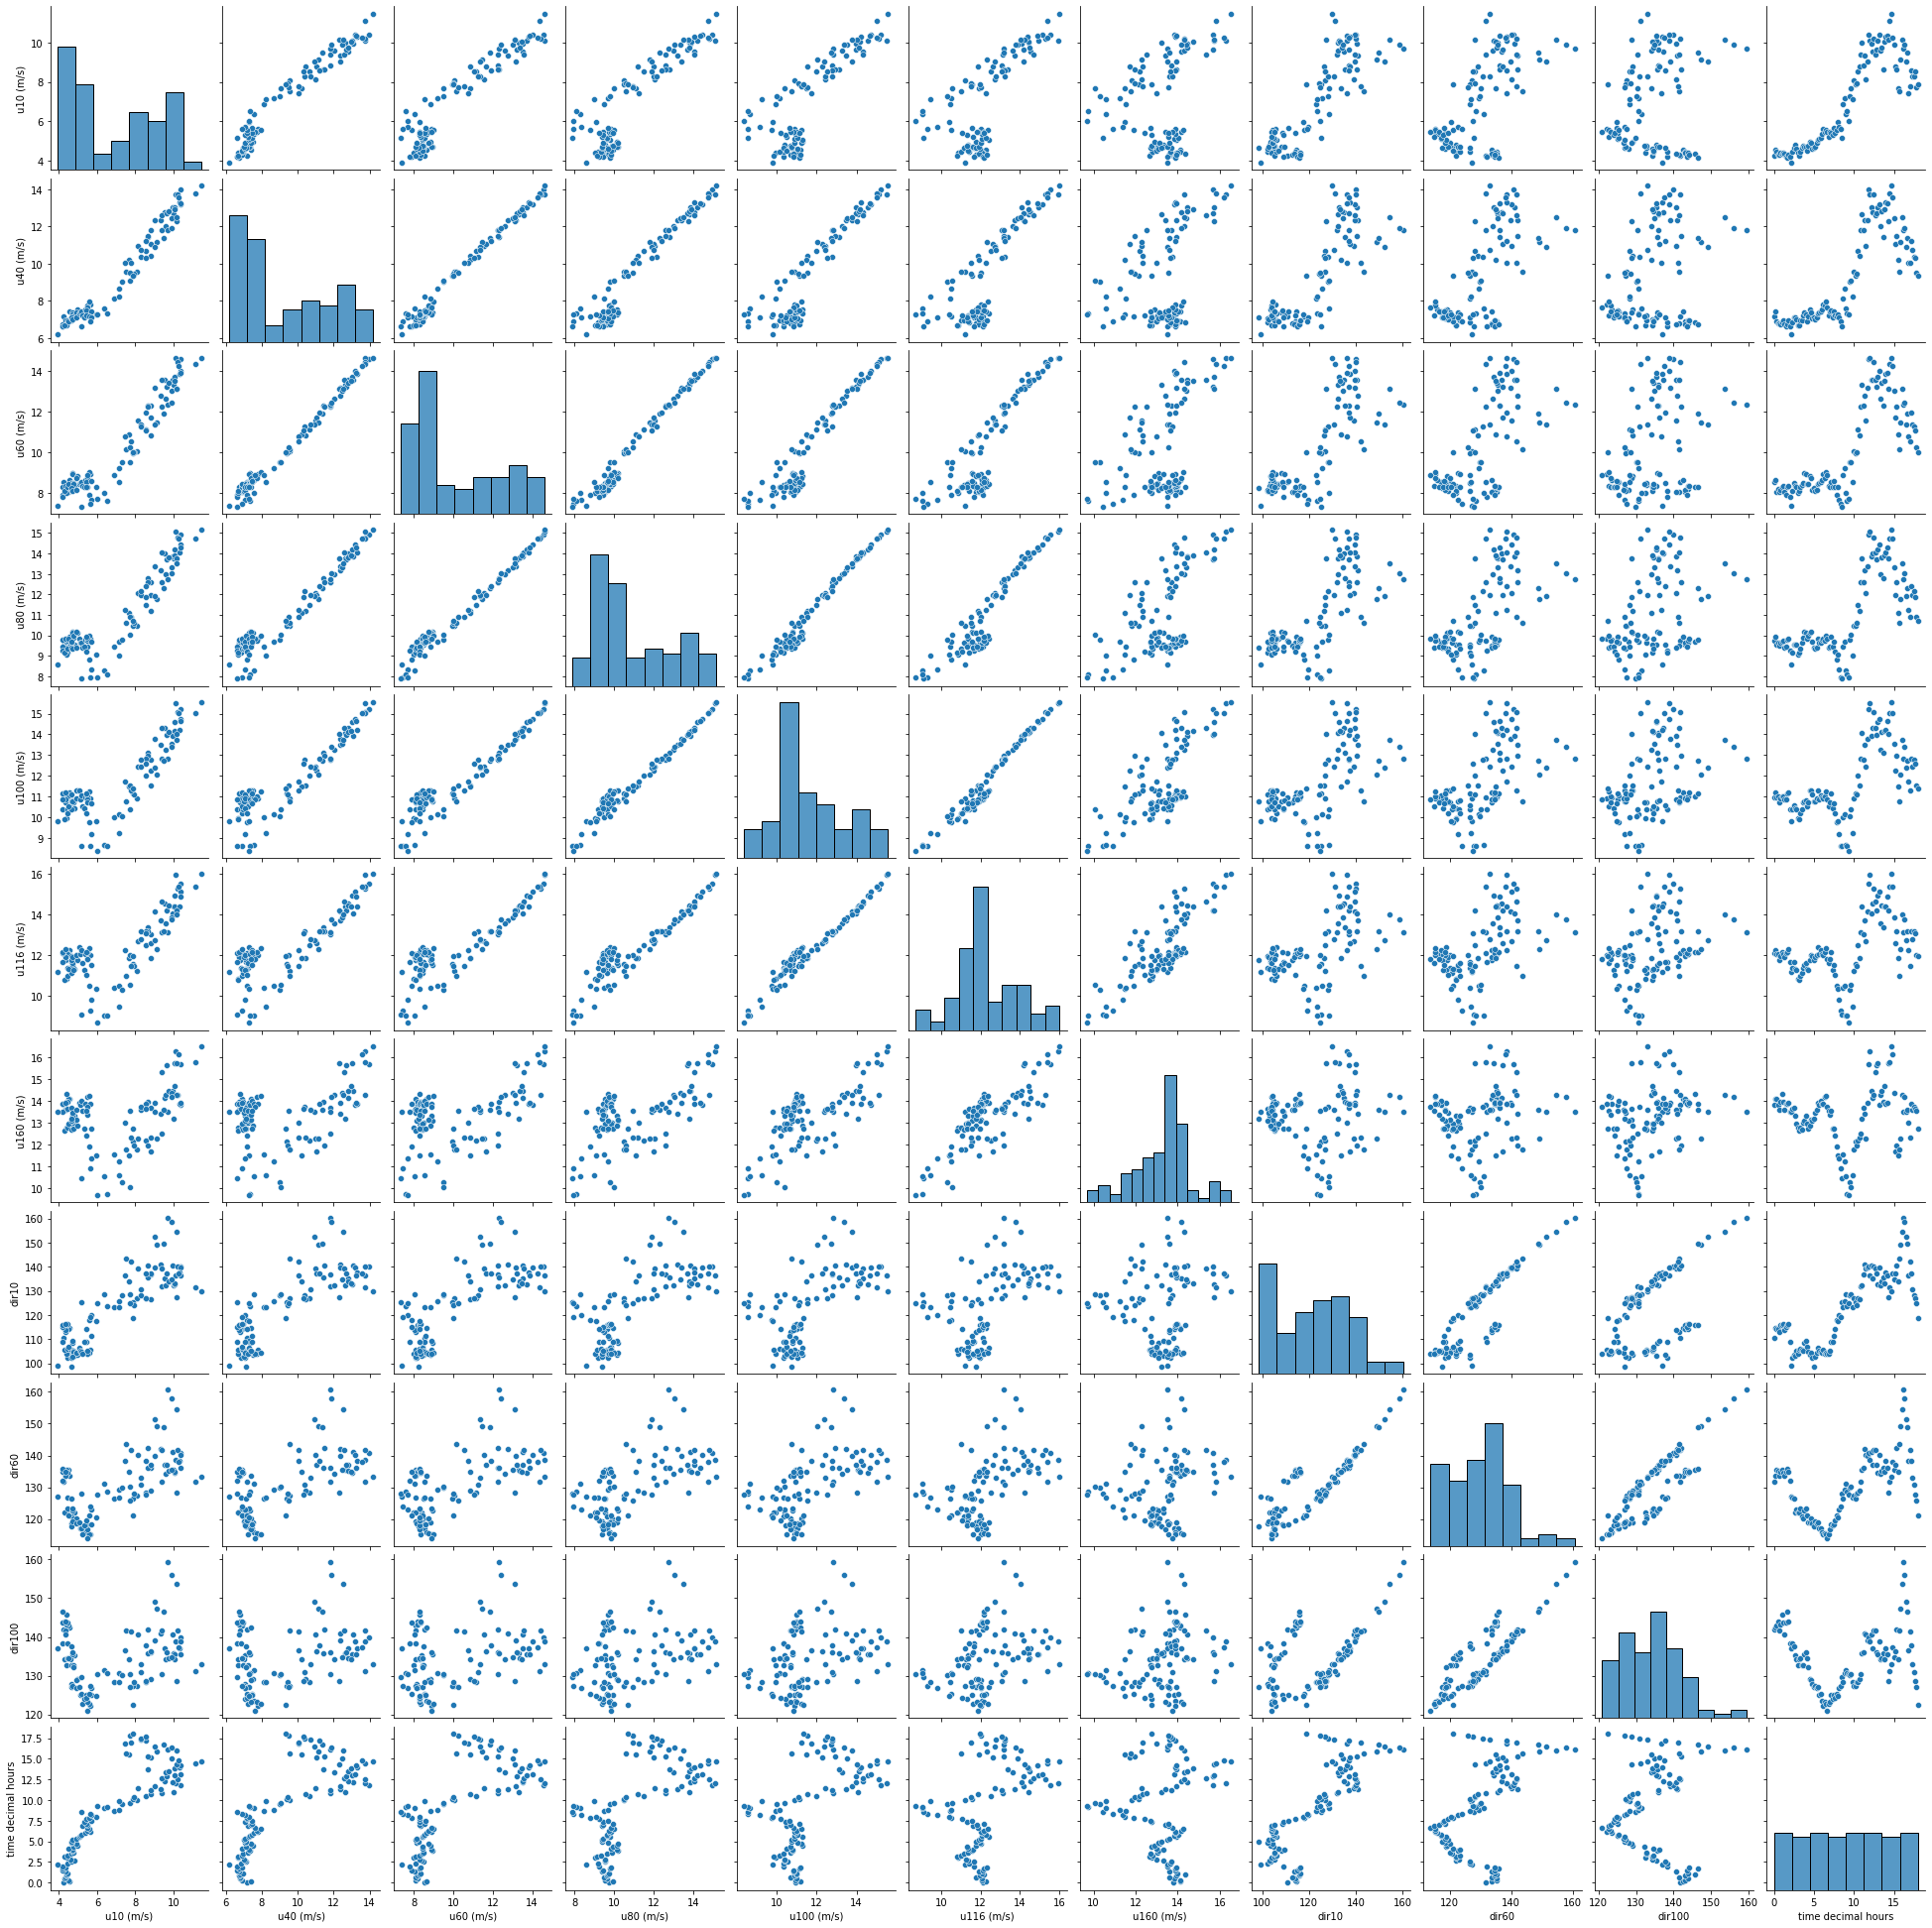

In [10]:
sns.pairplot(df)

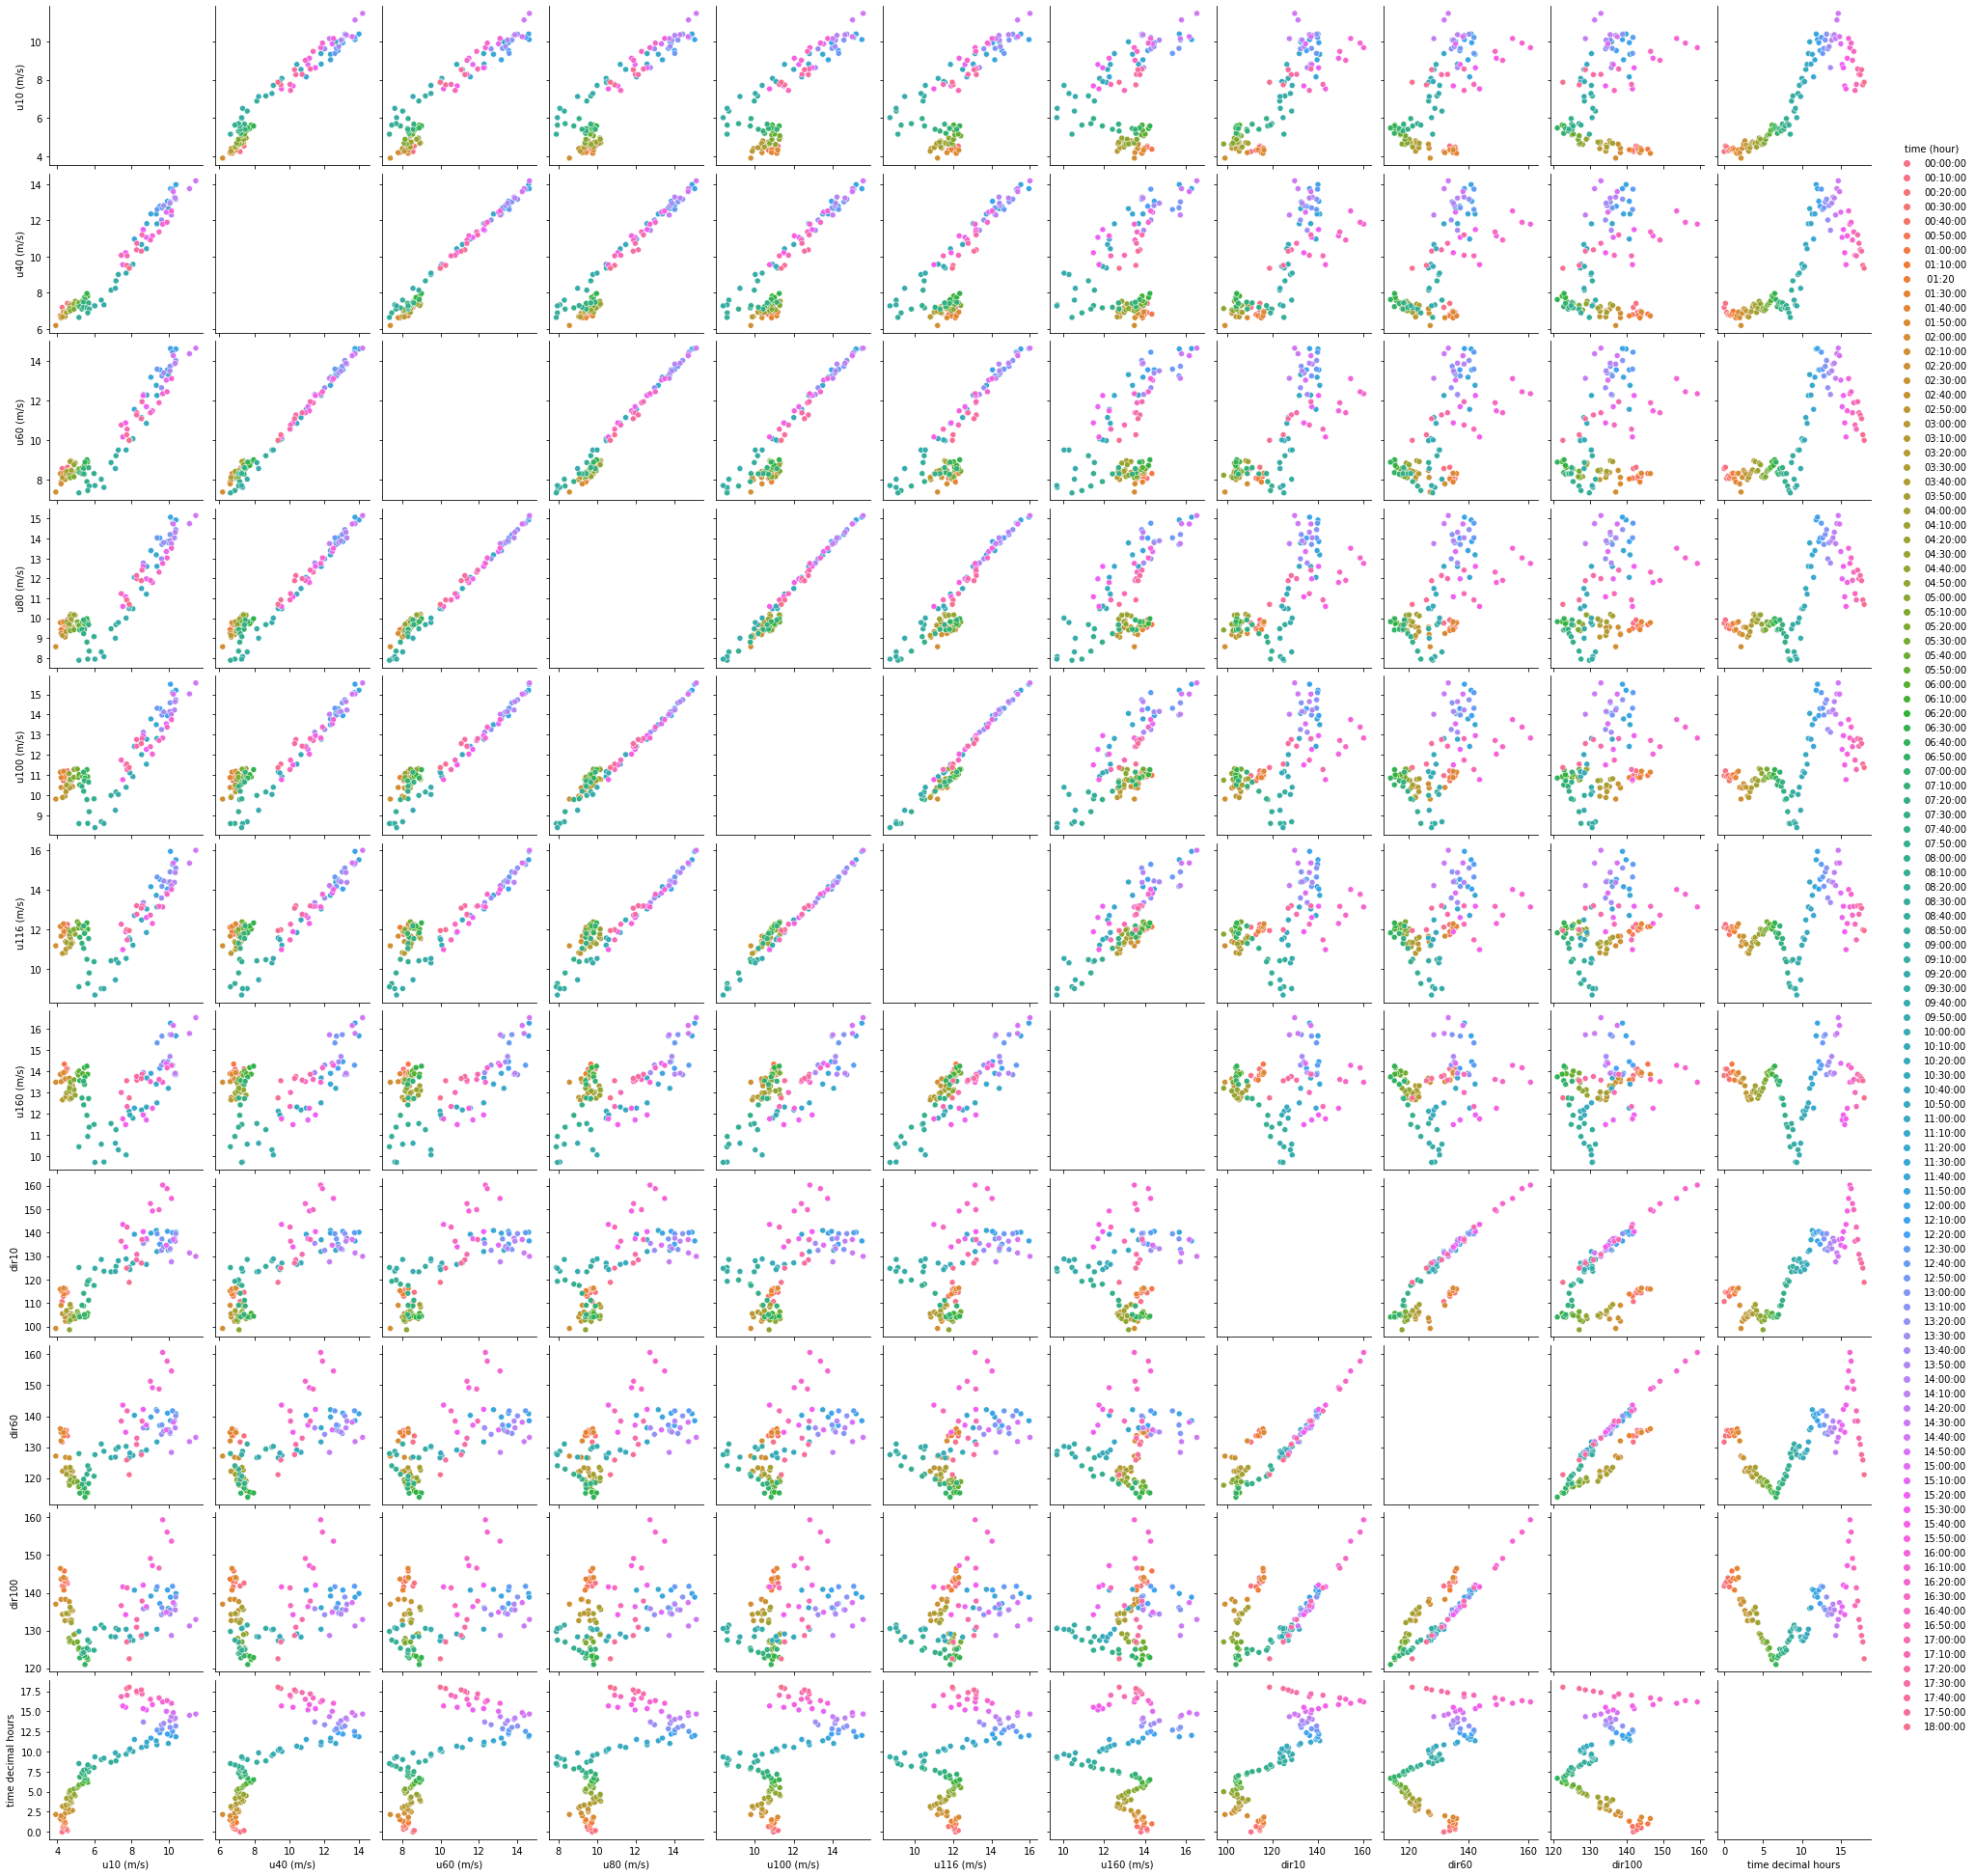

In [ ]:
sns.pairplot(df, hue="time (hour)")

In [12]:
#Escalado de datos para elaborar matriz de covarianza
scaler = StandardScaler()
scaled = scaler.fit_transform(
    df[['u10 (m/s)', 'u40 (m/s)', 'u60 (m/s)', 'u80 (m/s)',
       'u100 (m/s)', 'u116 (m/s)', 'u160 (m/s)'
       ]]
)
covariance_matrix = np.cov(scaled.T)

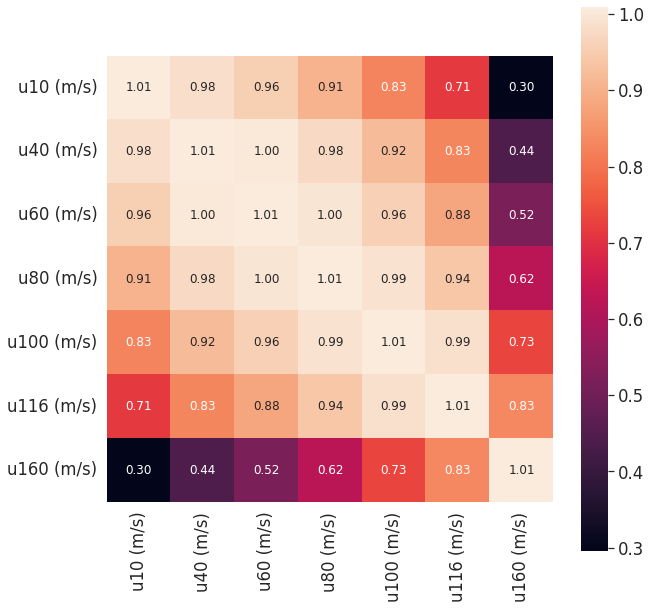

In [13]:
#Graficacion de matriz de covarianza
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm=sns.heatmap(covariance_matrix,
               cbar=True,
               annot=True,
               square=True,
               fmt='.2f',
               annot_kws={'size': 12},
               yticklabels=['u10 (m/s)', 'u40 (m/s)', 'u60 (m/s)', 'u80 (m/s)',
       'u100 (m/s)', 'u116 (m/s)', 'u160 (m/s)'
       ],
               xticklabels=['u10 (m/s)', 'u40 (m/s)', 'u60 (m/s)', 'u80 (m/s)',
       'u100 (m/s)', 'u116 (m/s)', 'u160 (m/s)'
       ])

Calculo de perfil de viento

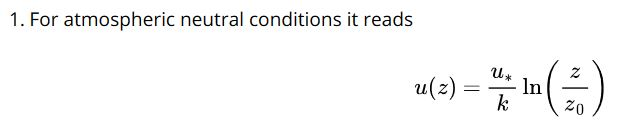

In [ ]:
k=0.4
for i in range(0,18,30):
  velocidad_friccion_u=k*(/math.log())

Mediciones de turbulencias con sensor Lidar de 20 Hz, en periodos de 30 min 

In [ ]:
df1 = pd.read_excel (
    "/content/TurbulenceDataSeries.xls",
    )
df1.head(10)

,u,v,w
0,8.149239,-1.004577,-0.386437
1,8.179172,-1.038056,-0.366863
2,8.124179,-0.961820,-0.326073
3,8.294137,-0.965844,-0.388507
4,8.291696,-1.051260,-0.418475
5,8.217856,-1.129117,-0.377416
6,8.246213,-1.086458,-0.347818
7,8.263049,-1.017781,-0.348059
8,8.257217,-1.004772,-0.367977
9,8.297239,-0.988131,-0.298542


In [ ]:
lista1=[]
for i in range(36000):
  lista1.append(i)
len(lista1)

36000

In [ ]:
df1.head()

,u,v,w
0,8.149239,-1.004577,-0.386437
1,8.179172,-1.038056,-0.366863
2,8.124179,-0.961820,-0.326073
3,8.294137,-0.965844,-0.388507
4,8.291696,-1.051260,-0.418475


In [ ]:
df1.median()

u    9.104761
v    0.015297
w    0.061710
dtype: float64

In [ ]:
df1.min()

u    6.668239
v   -2.603525
w   -2.361832
dtype: float64

In [ ]:
df1.max()

u    12.061346
v     2.487530
w     1.429760
dtype: float64

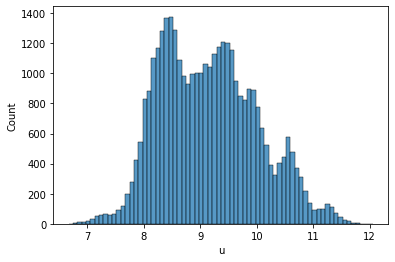

In [ ]:
#Diagrama de frecuencias de 'u'
sns.histplot(df1['u'])

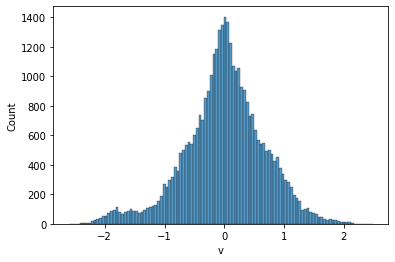

In [ ]:
#Diagrama de frecuencias de 'v'
sns.histplot(df1['v'])

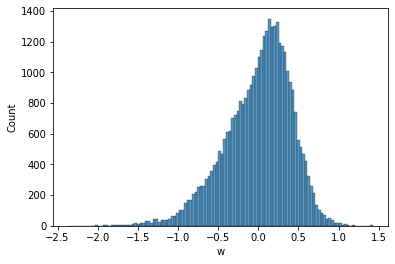

In [ ]:
#Diagrama de frecuencias de 'w'
sns.histplot(df1['w'])

Calculo de VPN de proyecto eolico

In [ ]:
Inver_inicial=-65000000
AEP=110000000
tarifa_venta=0.075
precio_venta=AEP*tarifa_venta
costos_oym=0.0091
costos=costos_oym*AEP
costos_netos=precio_venta-costos
values = [Inver_inicial,costos_netos, costos_netos, costos_netos, costos_netos, costos_netos, costos_netos, costos_netos, costos_netos, costos_netos, costos_netos, costos_netos, costos_netos, costos_netos, costos_netos, costos_netos, costos_netos, costos_netos, costos_netos, costos_netos, costos_netos, -3000000]
rate1 = 0.02
rate2 = 0.08
rate3 = 12
#Printing NPV Values
print("NPV value with rate ", rate1, " is: ", np.npv(rate1, values))
print("NPV value with rate ", rate2, " is: ", np.npv(rate2, values))
print("NPV value with rate ", rate3, " is: ", np.npv(rate3, values))

NPV value with rate  0.02  is:  51552212.86466666
NPV value with rate  0.08  is:  5575783.313810826
NPV value with rate  12  is:  -64395916.66666667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  from ipykernel import kernelapp as app


In [ ]:
costos_netos

7249000.0

In [ ]:
precio_venta

8250000.0

In [ ]:
costos

1001000.0

Valor presente neto del mantenimiento y reparaciones

In [ ]:
values1=[]
a=1001000
for i in range(20):
  values1.append(a)
print("NPV value with rate ", rate2, " is: ", np.npv(rate2, values1))

NPV value with rate  0.08  is:  10614202.799245276


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  """


Valor presente del desmantelamiento

In [ ]:
tasa_descuento=0.08
desmonte=3000000
VPNdes=desmonte*(1/(1+tasa_descuento)**20)
VPNdes

643644.6222121693

Valor presente de Costos

In [ ]:
inv_capital=65000000
VPN_OM=18537037
VPN_costos=VPNdes+VPN_OM+inv_capital
VPN_costos

84180681.62221217

Costo anual nivelado de energia (Euros/año)

In [ ]:
costo_nivel_anual=((-74250000*0.08)/(1-(1+0.08)**-20))
costo_nivel_anual

-7562526.505118931

Costo nivelado de energia (Euros/kWh)

In [ ]:
AEP=110000000
lcoe_kwh=7662526/AEP
lcoe_kwh

0.06965932727272728

In [ ]:
lcoe_cen=lcoe_kwh*100
lcoe_cen

6.965932727272728

In [ ]:
df.columns

Index(['Time', 'WindSpeed', 'Power'], dtype='object')

In [ ]:
df2 = pd.read_csv (
    "/content/Wind Time Series Dataset(10min).csv",
    )
df2.head(10)

,Time,WindSpeed,Power
0,2014-10-07 01:20:00,8.22,40.526173
1,2014-10-07 01:30:00,8.09,38.552540
2,2014-10-07 01:50:00,7.21,21.313683
3,2014-10-07 02:00:00,6.75,18.031418
4,2014-10-07 02:10:00,6.52,16.593281
5,2014-10-07 02:20:00,5.94,11.799710
6,2014-10-07 02:30:00,5.62,9.668083
7,2014-10-07 02:40:00,5.74,10.459349
8,2014-10-07 02:50:00,5.65,11.492787
9,2014-10-07 03:00:00,6.06,14.288767


In [ ]:
print("Estadisticos descriptivos")
print("Las medias son:\n", df2.mean())
print("Las medianas son:\n", df2.median())
print("Valor minimo de velocidad de viento:", df2['WindSpeed'].min())
print("Valor minimo de Potencia:", df2['Power'].min())
print("Valor maximo de velocidad de viento:", df2['WindSpeed'].max())
print("Valor maximo de Potencia:", df2['Power'].max())

Estadisticos descriptivos
Las medias son:
 WindSpeed     6.863497
Power        30.415774
dtype: float64
Las medianas son:
 WindSpeed     6.670000
Power        22.314745
dtype: float64
Valor minimo de velocidad de viento: 0.09
Valor minimo de Potencia: -0.00712269160040405
Valor maximo de velocidad de viento: 19.79
Valor maximo de Potencia: 100.0


In [ ]:
df2['Fecha'], df2['Hora'] = df2['Time'].str.split(' ', 1).str


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [ ]:
df2

,Time,WindSpeed,Power,Fecha,Hora
0,2014-10-07 01:20:00,8.22,40.526173,2014-10-07,01:20:00
1,2014-10-07 01:30:00,8.09,38.552540,2014-10-07,01:30:00
2,2014-10-07 01:50:00,7.21,21.313683,2014-10-07,01:50:00
3,2014-10-07 02:00:00,6.75,18.031418,2014-10-07,02:00:00
4,2014-10-07 02:10:00,6.52,16.593281,2014-10-07,02:10:00
...,...,...,...,...,...
39190,2015-10-06 23:10:00,7.45,30.580953,2015-10-06,23:10:00
39191,2015-10-06 23:20:00,7.15,28.455153,2015-10-06,23:20:00
39192,2015-10-06 23:30:00,7.27,30.080422,2015-10-06,23:30:00
39193,2015-10-06 23:40:00,8.19,42.483618,2015-10-06,23:40:00


In [ ]:
df2=df2.drop(['Time'], axis=1)
df2

,WindSpeed,Power,Fecha,Hora
0,8.22,40.526173,2014-10-07,01:20:00
1,8.09,38.552540,2014-10-07,01:30:00
2,7.21,21.313683,2014-10-07,01:50:00
3,6.75,18.031418,2014-10-07,02:00:00
4,6.52,16.593281,2014-10-07,02:10:00
...,...,...,...,...
39190,7.45,30.580953,2015-10-06,23:10:00
39191,7.15,28.455153,2015-10-06,23:20:00
39192,7.27,30.080422,2015-10-06,23:30:00
39193,8.19,42.483618,2015-10-06,23:40:00


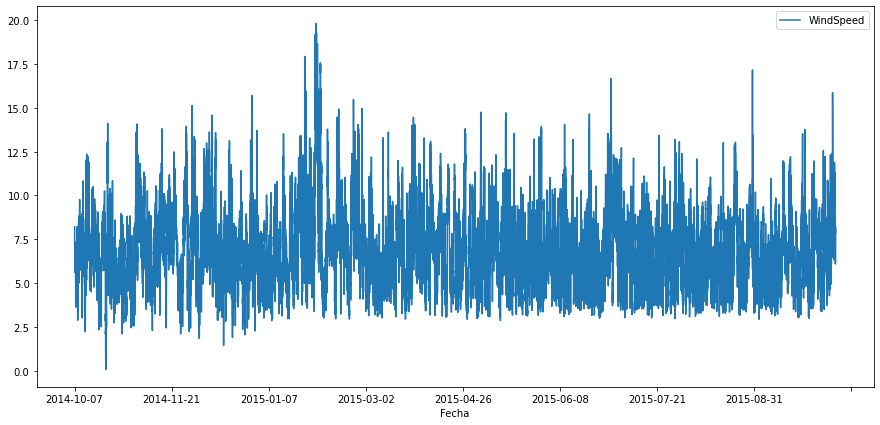

In [ ]:
df2.plot('Fecha','WindSpeed', figsize=(15,7))


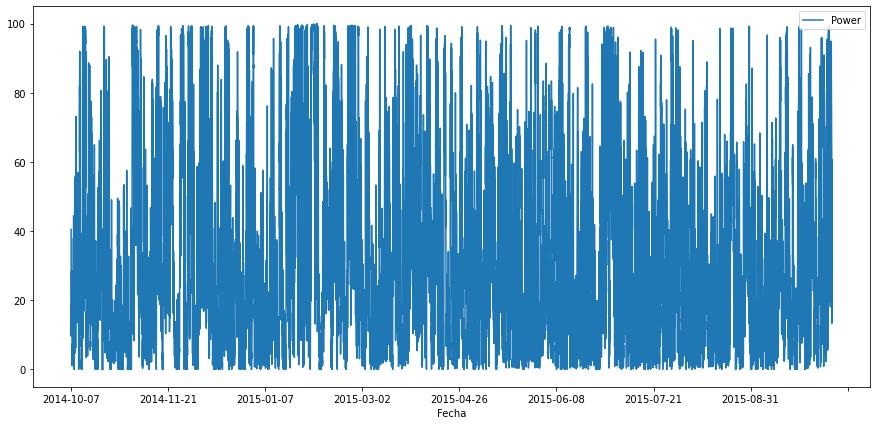

In [ ]:
df2.plot('Fecha','Power', figsize=(15,7))

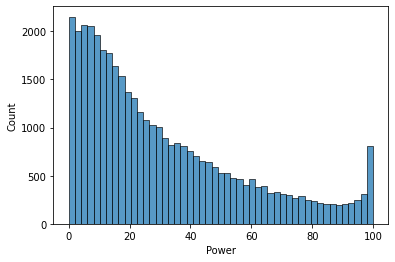

In [ ]:
sns.histplot(df2['Power'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


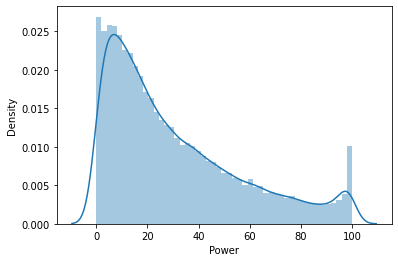

In [ ]:
sns.distplot(df2['Power'])

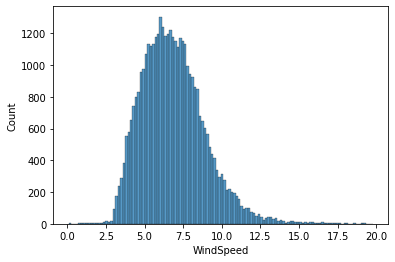

In [ ]:
sns.histplot(df2['WindSpeed'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


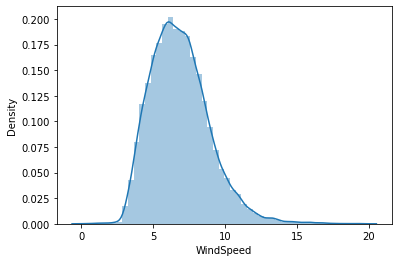

In [ ]:
sns.distplot(df2['WindSpeed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


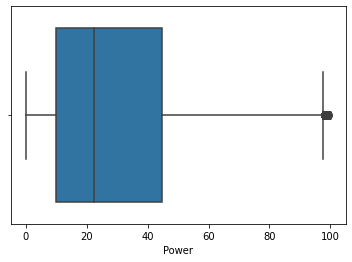

In [ ]:
sns.boxplot(df2['Power'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


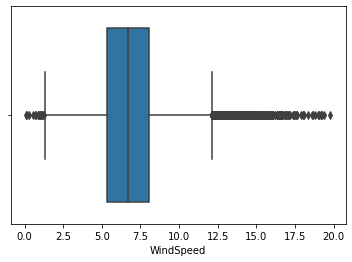

In [ ]:
sns.boxplot(df2['WindSpeed'])

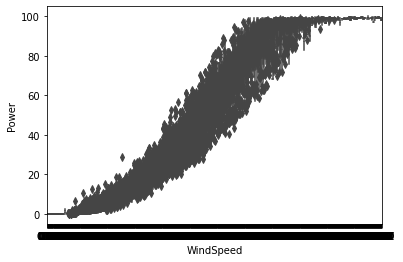

In [ ]:
#Diagramas de caja
sns.boxplot(x='WindSpeed', y='Power', data=df2)

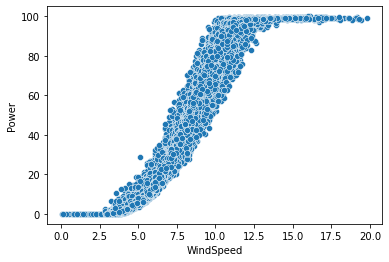

In [ ]:
#Diagrama de dispersión
sns.scatterplot(x='WindSpeed', y='Power', data=df2)

Potencia en funcion de area

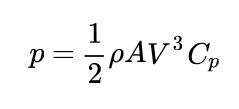

In [ ]:
#Fast-running horizontal-axis wind turbine 
velocidad=10
Ro=1.225
Cp1=0.49
p=5000000

A=p/(0.5*Ro*(velocidad**3)*Cp1)
print("El area requerida es:", A)
radio=(A/3.14)
radio=pow(radio,0.5)
print("El radio requerido es: ", radio)

El area requerida es: 16659.72511453561
El radio requerido es:  72.8398581885969


In [ ]:
#slow-running horizontal-axis wind turbine
Cp2=0.3
A1=p/((1/2)*Ro*(velocidad)**3*Cp2)
print("El area requerida es:", A1)
radio1=(A1/3.14)
radio1=pow(radio1,0.5)
print("El radio requerido es: ", radio1)

El area requerida es: 27210.884353741498
El radio requerido es:  93.09074463586781


In [ ]:
#Darrieus wind turbine 
Cp3=0.39
A2=p/((1/2)*Ro*(velocidad)**3*Cp3)
print("El area requerida es:", A2)
radio2=(A2/3.14)
radio2=pow(radio2,0.5)
print("El radio requerido es: ", radio2)

El area requerida es: 20931.449502878073
El radio requerido es:  81.64598410615066


In [ ]:
# Longitud de pala de Darrieus wind turbine
radio3=A2/3.14
radio3=pow(radio3,0.5)
print("El radio es: ", radio3)
longitud=radio3*3.14
print("La longitud es: ", longitud)

El radio es:  81.64598410615066
La longitud es:  256.3683900933131


In [ ]:
#Area of the kite wind turbine
g=5
cl=1
area=(27*p)/(4*0.5*(10**3)*(g**2)*cl)
print("El area es: ", area)

El area es:  2700.0


In [ ]:
#Area of the kite wind turbine
g=10
cl=1
area=(27*p)/(4*0.5*(10**3)*(g**2)*cl)
print("El area es: ", area)

El area es:  675.0


In [ ]:
#length of a straight and rigid beam
cp4=0.1
a=p/(0.5*Ro*(10**3)*cp4)
print(a)
l=a/10
print("La longitud es: ", l)

81632.6530612245
La longitud es:  8163.26530612245


## **Aerodynamics - 1D Momentum theory**

# Factor de induccion axial (a)
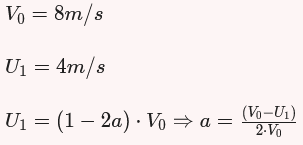


In [ ]:
Vo=8
U1=4
a=(Vo-U1)/(2*Vo)
print(a)

0.25


# Velocidad de flujo a través del rotor 

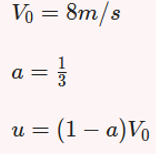

In [ ]:
a1=1/3
u=(1-a)*Vo
print(u)

6.0


# Radio del rotor

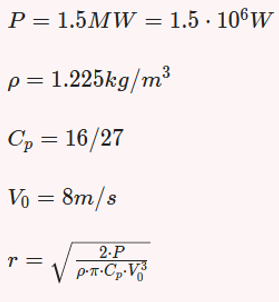

In [ ]:
import math
P=1500000
Ro=1.225
Cp=16/27
radio_rotor=math.sqrt((2*P)/(Ro*3.14*Cp*(Vo)**3))
print(radio_rotor)

50.70078332729486


# Fuerza de empuje

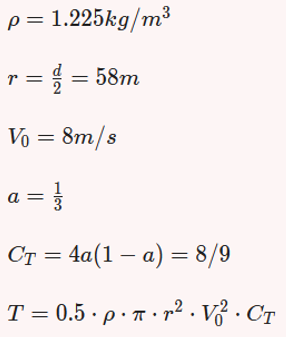

In [ ]:
a=1/3
Ct=8/9
r=58
T=0.5*Ro*3.14*(r**2)*(Vo**2)*Ct
print(T)

368060.47288888885


## Aerodynamics - Rotational theory and velocity triangle at r = 40m

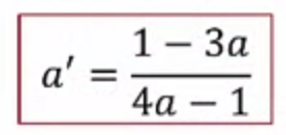

In [ ]:
A_p=(1-3*(1/3))/(4*(1/3)-1)
print(A_p)

0.0


In [ ]:
u=3
a=1-(u/Vo)
a

0.625

In [ ]:
#Calculo de masa en toneladas metricas de pala realizada en aluminio
g=10
vr=11
L=86
hoflap=2
pair=1.2
Ro=150000000 ## En MPa
Aoflap=((8*3.14)/81)*((pair*(vr**2)*(L**3))/(Ro*2))
Aoflap

0.0954718485491358

In [ ]:
pmat=2700

Aoedge=Aoflap*((pmat*10*(L**2))/((Ro*4)-(pmat*g*(L**2))))
Aoedge

0.04762573913205338

In [ ]:
Mblade=2*(Aoflap+Aoedge)*(L*pmat)
Mblade/1000

66.45451971914426

In [ ]:
#Calculo de masa en toneladas metricas de pala realizada en fibra de vidrio
g=10
vr=11
L=86
hoflap=2
pair=1.2
Ro_1=180000000 ## En MPa
Aoflap=((8*3.14)/81)*((pair*(vr**2)*(L**3))/(Ro_1*2))
Aoflap

0.07955987379094649

In [ ]:
pmat_1=1900

Aoedge=Aoflap*((pmat_1*10*(L**2))/((Ro*4)-(pmat_1*g*(L**2))))
Aoedge

0.024332221279455214

In [ ]:
Mblade=2*(Aoflap+Aoedge)*(L*pmat_1)
Mblade/1000

33.95193666900728

In [ ]:
#Calculo de masa en toneladas metricas de pala realizada en fibra de carbono
g=10
vr=11
L=86
hoflap=2
pair=1.2
Ro_2=300000000 ## En MPa
Aoflap=((8*3.14)/81)*((pair*(vr**2)*(L**3))/(Ro_2*2))
Aoflap

0.0477359242745679

In [ ]:
pmat_2=1600

Aoedge=Aoflap*((pmat_2*10*(L**2))/((Ro_2*4)-(pmat_2*g*(L**2))))
Aoedge

0.005222396543617304

In [ ]:
Mblade=2*(Aoflap+Aoedge)*(L*pmat_2)
Mblade/1000

14.574129889164567